In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
# 生成数据集
def synthetic_data(w, b, num_examples):
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [5]:
print('features:{}\nlabel:{}'.format(features[0], labels[0]))

features:tensor([2.0908, 1.3168])
label:tensor([3.9017])


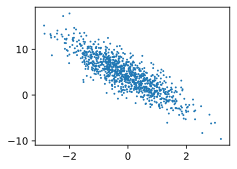

In [6]:
# features[:, 1]和labels的散点图
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [9]:
# 读取数据集
# 打乱数据集的样本，并以小批量方式获取数据
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i+batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]

In [10]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.4011,  1.1203],
        [ 0.6241,  1.1875],
        [ 1.4746, -1.1675],
        [-1.2367,  0.9777],
        [ 2.0968,  0.0864],
        [-0.4493, -0.3919],
        [-0.0166, -2.1221],
        [-0.5694, -1.5518],
        [-0.1515,  0.3850],
        [ 0.6966, -0.3799]]) 
 tensor([[ 1.1871],
        [ 1.4103],
        [11.1237],
        [-1.6153],
        [ 8.1101],
        [ 4.6235],
        [11.3581],
        [ 8.3455],
        [ 2.5791],
        [ 6.8916]])


In [11]:
# 初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [12]:
# 定义模型
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [13]:
# 定义损失函数
def squard_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [14]:
# 定义优化算法
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [15]:
# 训练
lr = 0.03
num_epochs = 3
net = linreg
loss = squard_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)   # 小批量计算损失
        l.sum().backward()          # 小批量损失求和，再反向传播
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels) # 整体的损失
        print(f"epoch {epoch+1}, loss {float(train_l.mean()):f}")

epoch 1, loss 0.023554
epoch 2, loss 0.000082
epoch 3, loss 0.000051


In [16]:
print(f"w的估计误差：{true_w - w.reshape(true_w.shape)}")
print(f"b的估计误差：{true_b - b}")

w的估计误差：tensor([0.0002, 0.0002], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.0006], grad_fn=<RsubBackward1>)
